# Regularization and Cross-Validation
*Complete and hand in this completed worksheet (including its outputs and any supporting code outside of the worksheet) with your assignment submission. Please check the pdf file for more details.*

In this exercise you will:
    
- implement **Ridge Regression** to control overfitting
- implement **Logistic Regression with regularization** to control overfitting 
- implement **Cross-Validation** to control overfitting

In [1]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

%load_ext autoreload
%autoreload 2

In [2]:
digit_train = sio.loadmat('digit_train')
X = digit_train['X']
y = digit_train['y']
digit_test = sio.loadmat('digit_test')
X_test = digit_test['X_test']
y_test = digit_test['y_test']

In [3]:
def show_digit(fea):
    plt.rcParams['figure.figsize'] = (10.0, 8.0)
    idx = np.random.permutation(X.shape[1])
    fea = fea[:, idx[:100]]
    faceW = 28
    faceH = 28
    numPerLine = 20
    ShowLine = 4
    Y = np.zeros((faceH * ShowLine, faceW * numPerLine), dtype=np.float)
    for i in range(ShowLine):
        for j in range(numPerLine):
            Y[i * faceH:(i + 1) * faceH, j * faceW:(j + 1) * faceW] = fea[:,i * numPerLine + j].reshape((faceH, faceW))            
    plt.imshow(Y, cmap='gray')

### Ridge Regression and LOOCV

0 0
1 0.0
2 0.001
3 0.01
4 0.1
5 1.0
6 10.0
7 10.0
lambda: 10.0
Train Error: 0.0 Test Error: 0.07232546459065796


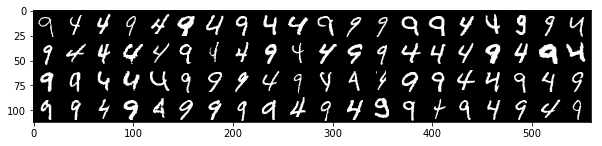

In [23]:
show_digit(X)
# Do feature normalization here
# begin answer
minX = np.min(X)
maxX = np.max(X)
meanX = (minX + maxX) / 2
X = (X - meanX)/(maxX - minX)
# end answer

# Do LOOCV
lmbdas = np.array([0, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3])
lmbda = 0
E_val_min = float('inf')

from ridge import ridge
for i in range(len(lmbdas)):
    E_val = 0
    for j in range(X.shape[1]):
        X_ = np.delete(X, j, axis=1)
        y_ = np.delete(y, j, axis=1) 
        w = ridge(X_, y_, lmbdas[i])
        xj = X[:,j].reshape(X.shape[0], 1)
        xj = np.vstack((np.ones((1, 1)), xj))
        E_val += (y[0][j] - np.matmul(w.T, xj)) ** 2

    # Update lmbda according validation error
    # begin answer
    if E_val < E_val_min:
        lmbda = lmbdas[i]
        E_val_min = E_val
    # end answer
    
# Compute training error
w = ridge(X, y, lmbda)
y_hat = np.sign(np.matmul(w.T, np.vstack((np.ones((1, X.shape[1])), X))))
E_train = np.sum(y_hat != y)/X.shape[1]
# Do feature normalization to X_test, y_test
minXt = np.min(X_test)
maxXt = np.max(X_test)
meanXt = (minXt + maxXt) / 2
X_test = (X_test - meanXt)/(maxXt - minXt)
# Compute test error
yt_hat = np.sign(np.matmul(w.T, np.vstack((np.ones((1, X_test.shape[1])), X_test))))
E_test = np.sum(yt_hat != y_test)/X_test.shape[1]
print('lambda:', lmbda)
print('Train Error:', E_train, 'Test Error:', E_test)

In [26]:
w = ridge(X, y, 0)
print('Without lambda:', np.matmul(w.T, w)[0][0])
w = ridge(X, y, 10)
print('With lambda = 10:', np.matmul(w.T, w)[0][0])

Without lambda: 14.588684686877132
With lambda = 10: 1.2254129352861054


### Logistic Regression with Regularization
Use the simlimar skeleton code above to implement it.

In [55]:
from logistic_r import logistic_r

# regularization y and y_test from {-1, 1} to {0, 1}
for i in range(y.shape[1]):
    if(y[0][i] == -1):
        y[0][i] = 0
for i in range(y_test.shape[1]):
    if(y_test[0][i] == -1):
        y_test[0][i] = 0

lmbda = 0
lmbdas = np.array([0, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3])
E_val_min = float('inf')
for i in range(len(lmbdas)):
    E_val = 0
    for j in range(X.shape[1]):
        X_ = np.delete(X, j, axis=1)
        y_ = np.delete(y, j, axis=1)
        w = logistic_r(X, y, lmbdas[i])
        xj = X[:,j].reshape(X.shape[0], 1)
        xj = np.vstack((np.ones((1, 1)), xj))
        yj_hat = 1/(1+np.exp(-np.matmul(w.T, xj)))
        if(y[0][j] == 0):
            E_val -= np.log(1-yj_hat)
        else:
            E_val -= np.log(yj_hat)
        
    # Update lmbda according validation error
    # begin answer
    print(i, E_val)
    if E_val < E_val_min:
        lmbda = lmbdas[i]
        E_val_min = E_val
    # end answer
    
# Compute training error
w = logistic_r(X, y, lmbda)
y_hat = 1/(1+np.exp(-np.matmul(w.T, np.vstack((np.ones((1, X.shape[1])), X)))))
for i in range(y_hat.shape[1]):
    if(y_hat[0][i] > 0.5):
        y_hat[0][i] = 1
    else:
        y_hat[0][i] = 0
E_train = np.sum(y != y_hat)/X.shape[1]
# Compute test error
yt_hat = 1/(1+np.exp(-np.matmul(w.T, np.vstack((np.ones((1, X_test.shape[1])), X_test)))))
for i in range(yt_hat.shape[1]):
    if(yt_hat[0][i] > 0.5):
        yt_hat[0][i] = 1
    else:
        yt_hat[0][i] = 0
E_test = np.sum(y_test != yt_hat)/X_test.shape[1]
print('lambda:', lmbda)
print('Train Error:', E_train, 'Test Error:', E_test)

0 [[0.09282286]]
1 [[0.08924492]]
2 [[0.2803945]]
3 [[43.78940047]]


E:\Anaconda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in log


4 [[inf]]
5 [[5913.12416899]]


D:\xinzhu\Data Mining\hw2\hw2_code\regularization-cross-validation\logistic_r.py:24: RuntimeWarning: overflow encountered in exp
  y_hat = 1/(1+np.exp(-np.matmul(w.T, Xb)))
E:\Anaconda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: overflow encountered in exp
E:\Anaconda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


6 [[inf]]


D:\xinzhu\Data Mining\hw2\hw2_code\regularization-cross-validation\logistic_r.py:26: RuntimeWarning: overflow encountered in multiply
  grad = np.matmul(-(y-y_hat), Xb.T).T + 2*lmbda*w
D:\xinzhu\Data Mining\hw2\hw2_code\regularization-cross-validation\logistic_r.py:24: RuntimeWarning: invalid value encountered in matmul
  y_hat = 1/(1+np.exp(-np.matmul(w.T, Xb)))


7 [[nan]]


E:\Anaconda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in less


lambda: 0.001
Train Error: 0.0 Test Error: 0.065796082370668
